In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import tensorflow as tf
import math
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import os
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam

In [26]:
folder_path = r"Raise The Stakes Data"
time_step = 20
X_train_all, y_train_all = [], []

def create_dataset(close_scaled, vol_raw_mul, time_step=1):
    dataX, dataY = [], []
    for i in range(len(close_scaled) - time_step - 1):
        a = close_scaled[i:(i + time_step), 0]
        extra_feature = vol_raw_mul[i + time_step]
        a = np.append(a, extra_feature)
        dataX.append(a.reshape(-1, 1))
        dataY.append(close_scaled[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

for filename in os.listdir(folder_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(folder_path, filename)
        try:
            df = pd.read_csv(file_path)

            if 'Close' not in df.columns or 'Volume' not in df.columns:
                print(f"Skipped {filename}: Missing 'Close' or 'Volume' column.")
                continue

            # Raw values for Close * Volume
            close_raw = df['Close'].values.reshape(-1, 1)
            volume_raw = df['Volume'].values.reshape(-1, 1)
            close_mul_volume_raw = (close_raw * volume_raw).flatten()

            # Scale only 'Close'
            close_scaler = MinMaxScaler(feature_range=(0, 1))
            close_scaled = close_scaler.fit_transform(close_raw)

            # Create dataset (no train/test split)
            X_data, y_data = create_dataset(close_scaled, close_mul_volume_raw, time_step)

            X_train_all.append(X_data)
            y_train_all.append(y_data)

            print(f"Processed {filename}: X = {X_data.shape}, y = {y_data.shape}")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Final concatenation
X_train_final = np.concatenate(X_train_all, axis=0)
y_train_final = np.concatenate(y_train_all, axis=0)

print("\nFinal shapes:")
print("X_train_final:", X_train_final.shape)
print("y_train_final:", y_train_final.shape)


Processed ACN.USUSD_Candlestick_1_s_BID_16.06.2025-16.06.2025.csv: X = (2610, 21, 1), y = (2610,)
Processed ACN.USUSD_Candlestick_1_s_BID_17.06.2025-17.06.2025.csv: X = (3892, 21, 1), y = (3892,)
Processed ACN.USUSD_Candlestick_1_s_BID_18.06.2025-18.06.2025.csv: X = (3879, 21, 1), y = (3879,)
Processed ACN.USUSD_Candlestick_1_s_BID_20.06.2025-20.06.2025.csv: X = (5170, 21, 1), y = (5170,)
Processed ADBE.USUSD_Candlestick_1_s_BID_16.06.2025-16.06.2025.csv: X = (4672, 21, 1), y = (4672,)
Processed ADBE.USUSD_Candlestick_1_s_BID_17.06.2025-17.06.2025.csv: X = (6046, 21, 1), y = (6046,)
Processed ADBE.USUSD_Candlestick_1_s_BID_18.06.2025-18.06.2025.csv: X = (5152, 21, 1), y = (5152,)
Processed ADBE.USUSD_Candlestick_1_s_BID_20.06.2025-20.06.2025.csv: X = (2983, 21, 1), y = (2983,)
Processed AMZN.USUSD_Candlestick_1_s_BID_16.06.2025-16.06.2025.csv: X = (12018, 21, 1), y = (12018,)
Processed AMZN.USUSD_Candlestick_1_s_BID_17.06.2025-17.06.2025.csv: X = (9913, 21, 1), y = (9913,)
Processed AM

In [30]:
X_train_final

array([[0.        ],
       [0.17241379],
       [0.23908046],
       [0.39310345],
       [0.39310345],
       [0.44367816],
       [0.44137931],
       [0.44137931],
       [0.44137931],
       [0.44137931],
       [0.44137931],
       [0.44367816],
       [0.44367816],
       [0.44137931],
       [0.44367816],
       [0.44137931],
       [0.52873563],
       [0.52873563],
       [0.52873563],
       [0.52873563],
       [4.1567988 ]])

In [32]:
X_train_final[0]

array([[0.        ],
       [0.17241379],
       [0.23908046],
       [0.39310345],
       [0.39310345],
       [0.44367816],
       [0.44137931],
       [0.44137931],
       [0.44137931],
       [0.44137931],
       [0.44137931],
       [0.44367816],
       [0.44367816],
       [0.44137931],
       [0.44367816],
       [0.44137931],
       [0.52873563],
       [0.52873563],
       [0.52873563],
       [0.52873563],
       [4.1567988 ]])

In [15]:
model = Sequential()
model.add(LSTM(time_step+1, return_sequences=True, input_shape=(time_step+1,1)))
model.add(Dropout(0.2))
model.add(LSTM(time_step+1, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(time_step+1))
model.add(Dropout(0.2))
model.add(Dense(1))
opt = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=opt)




C:\Users\chinm\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 21, 21)              │           1,932 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 21, 21)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 21, 21)              │           3,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 21, 21)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 21)                  │           3,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 21)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              22 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,178 (35.85 KB)

 Trainable params: 9,178 (35.85 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
early_stop = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
model.fit(X_train_final, y_train_final,epochs=70, batch_size=2048, callbacks=[early_stop])

Epoch 1/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 494ms/step - loss: 0.0043
Epoch 2/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 39s 537ms/step - loss: 0.0033
Epoch 3/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 470ms/step - loss: 0.0029
Epoch 4/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 37s 502ms/step - loss: 0.0025
Epoch 5/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 37s 452ms/step - loss: 0.0023
Epoch 6/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 46s 517ms/step - loss: 0.0020
Epoch 7/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 445ms/step - loss: 0.0019
Epoch 8/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 36s 488ms/step - loss: 0.0017
Epoch 9/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 40s 467ms/step - loss: 0.0016
Epoch 10/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 505ms/step - loss: 0.0016
Epoch 11/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 38s 460ms/step - loss: 0.0015
Epoch 12/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 44s 504ms/step - loss: 0.0014
Epoch 13/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 34s 464ms/step - loss: 0.0015
Epoch 14/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 37s 509ms/step - loss: 0.0014
Epoch 15/70
73/73 ━━━━━━━━━━━━━━━━━━━━ 33s 

In [5]:
time_step=20
def create_dataset(close_scaled, vol_raw_mul, time_step=1):
    dataX, dataY = [], []
    for i in range(len(close_scaled) - time_step - 1):
        a = close_scaled[i:(i + time_step), 0]
        extra_feature = vol_raw_mul[i + time_step]
        a = np.append(a, extra_feature)
        dataX.append(a.reshape(-1, 1))
        dataY.append(close_scaled[i + time_step, 0])
    return np.array(dataX), np.array(dataY)
try:
    df = pd.read_csv("Test.csv")

    if 'Close' not in df.columns or 'Volume' not in df.columns:
        raise ValueError("Missing 'Close' or 'Volume' column.")

    # Raw values
    close_raw = df['Close'].values.reshape(-1, 1)
    volume_raw = df['Volume'].values.reshape(-1, 1)
    close_mul_volume_raw = (close_raw * volume_raw).flatten()

    # Scale 'Close' (separately from training)
    close_scaler = MinMaxScaler(feature_range=(0, 1))
    close_scaled = close_scaler.fit_transform(close_raw)

    # Create test dataset
    X_test, y_test = create_dataset(close_scaled, close_mul_volume_raw, time_step)

    print("Test.csv processed successfully.")
    print("X_test shape:", X_test.shape)
    print("y_test shape:", y_test.shape)

except Exception as e:
    print("Error processing Test.csv:", e)

Test.csv processed successfully.
X_test shape: (2616, 21, 1)
y_test shape: (2616,)


In [7]:
model = tf.keras.models.load_model("RaiseTheStakes.keras")

In [9]:
test_predict=model.predict(X_test)

82/82 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step


In [10]:
test_predict=close_scaler.inverse_transform(test_predict)

In [13]:
math.sqrt(mean_squared_error(y_test,test_predict))

20.875058882845266

In [15]:
y_test_final=close_scaler.inverse_transform(y_test.reshape(-1, 1))

In [17]:
y_test_final

array([[21.687],
       [21.686],
       [21.697],
       ...,
       [21.246],
       [21.247],
       [21.236]])

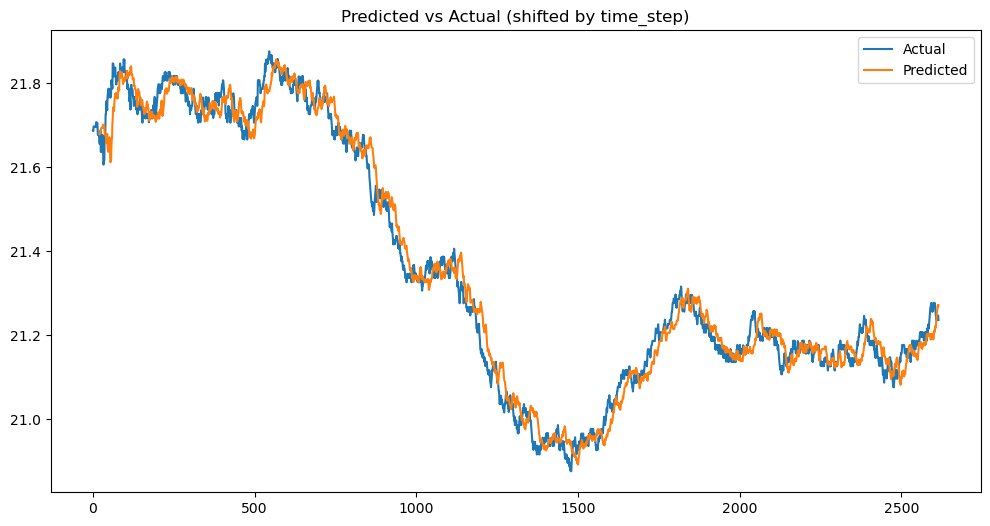

In [48]:
test_predict_plot = np.empty_like(y_test_final)
test_predict_plot[:] = np.nan
test_predict_plot[20:] = test_predict[:-20]
plt.figure(figsize=(12,6))
plt.plot(y_test_final, label='Actual')
plt.plot(test_predict_plot, label='Predicted')
plt.legend()
plt.title("Predicted vs Actual (shifted by time_step)")
plt.show()